Pipeline com múltiplas etapas no scikit-learn:
- Inclui imputação de valores ausentes, geração de features polinomiais, escalonamento e modelo.

MSE (Erro Médio Quadrático): 440.27
R² (Coeficiente de Determinação): 0.36


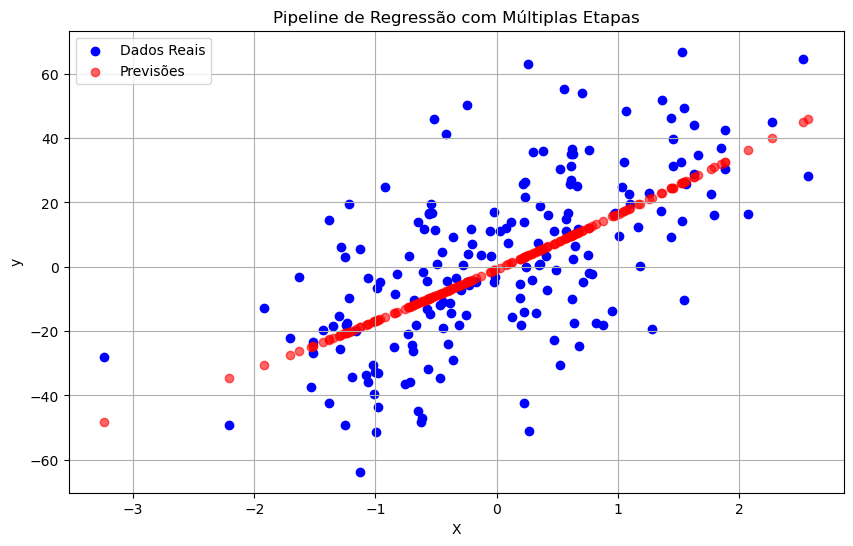

In [1]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Explicação inicial
print("Pipeline com múltiplas etapas no scikit-learn:")
print("- Inclui imputação de valores ausentes, geração de features polinomiais, escalonamento e modelo.\n")

# Gerando dados sintéticos para regressão com ruído e valores ausentes
X, y = make_regression(n_samples=1000, n_features=1, noise=20, random_state=42)
# Adicionando valores ausentes
rng = np.random.default_rng(42)
missing_indices = rng.choice(len(X), size=50, replace=False)
X[missing_indices] = np.nan

# Dividindo os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando o pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Imputação de valores ausentes
    ('polynomial_features', PolynomialFeatures(degree=2, include_bias=False)),  # Geração de features polinomiais
    ('scaler', StandardScaler()),  # Escalonamento dos dados
    ('model', LinearRegression())  # Modelo de regressão linear
])

# Treinando o pipeline
pipeline.fit(X_train, y_train)

# Previsões no conjunto de teste
y_pred = pipeline.predict(X_test)

# Métricas de avaliação
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE (Erro Médio Quadrático): {mse:.2f}")
print(f"R² (Coeficiente de Determinação): {r2:.2f}")

# Visualizando os resultados
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Dados Reais')
plt.scatter(X_test, y_pred, color='red', label='Previsões', alpha=0.6)
plt.title("Pipeline de Regressão com Múltiplas Etapas")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()
